In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [142]:
mu01 = (3, 0)
sigma01 = [[2, 0],[0, 1]]
mu02 = (0, 3)
sigma02 = [[1, 0],[0, 2]]
mu1= (2, 2)
sigma1 = [[1, 0],[0, 1]]

In [143]:
# generate data
data=[]
for i in range (10000):
  labeltogenerate = np.random.uniform()
  if(labeltogenerate <= 0.65):
    disttochoose = np.random.uniform()
    if(disttochoose <= 0.5):
      value = np.random.multivariate_normal(mu01,sigma01,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(0)
      data.append(ele)
    else:
      value = np.random.multivariate_normal(mu02,sigma02,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(0)
      data.append(ele)
  else:
    value = np.random.multivariate_normal(mu1,sigma1,1)
    ele=[]
    ele.append(value[0][0])
    ele.append(value[0][1])
    ele.append(1)
    data.append(ele)
df = pd.DataFrame(data, columns = ['x', 'y', 'label'])
df.head()

,x,y,label
0,1.125038,2.134699,1
1,1.262264,2.329183,0
2,2.669114,1.146962,0
3,5.231290,-1.155064,0
4,0.030084,2.527421,0


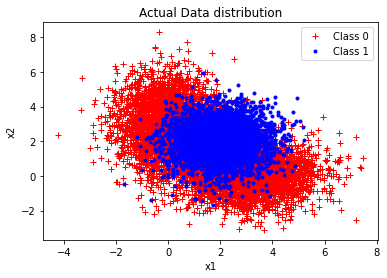

In [144]:
# Plot the actual data distribution
x0 = [i for i in range(df.shape[0]) if (df.label[i] == 0)]
x1 = [i for i in range(df.shape[0]) if (df.label[i] == 1 )]
plt.plot(df.x[x0],df.y[x0],'+',color ='red')
plt.plot(df.x[x1],df.y[x1],'.',color = 'blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Actual Data distribution")
plt.legend(['Class 0','Class 1'])
plt.show()

In [145]:
n1 = df.label.value_counts(ascending=True).iloc[0]
n0 = df.label.value_counts(ascending=True).iloc[1]

In [146]:
print(n0)
print(n1)

6466
3534


In [147]:
dataonly = df.drop(['label'], axis =1)

In [148]:
X = dataonly.to_numpy()
X

array([[ 1.1250378 ,  2.13469915],
       [ 1.26226363,  2.32918275],
       [ 2.66911383,  1.14696244],
       ...,
       [ 1.44864561,  2.17398709],
       [ 2.29864302,  3.58928415],
       [ 4.70142923, -0.09535605]])

In [130]:
label1 = multivariate_normal.pdf(X, mu1, sigma1)
label0 = 0.5*multivariate_normal.pdf(X, mu01, sigma01) + 0.5*multivariate_normal.pdf(X, mu02, sigma02)

In [131]:
ratio = np.log(label1)- np.log(label0)
ratio.shape

(10000,)

In [132]:
#generate some threshold values
# thresholdValues = X[:,1]
# for i in range(len(thresholdValues)-1):
#   thresholdValues[i] = 0.5*thresholdValues[i] + 0.5*thresholdValues[i+1]
# thresholdValues = [thresholdValues[i] for i in range(0,len(thresholdValues)) if thresholdValues[i]>=0]
thresholdValues = sorted(ratio)
#thresholdValues=[ratio[i] for i in range(ratio.shape[0]) if ratio[i] > 0]
# minValue = 0
# minValue = 0.01*minValue
# maxValue = max(thresholdValues)
# maxValue = 1.00001*maxValue
# step = (maxValue-minValue)/(len(thresholdValues))
# finalthresholdValues = [minValue+i*step for i in range(len(thresholdValues))]
# for i in range(len(thresholdValues)-1):
#   thresholdValues[i] = 0.5*thresholdValues[i] + 0.5*thresholdValues[i+1]
#finalthresholdValues = sorted(finalthresholdValues)
# diffThreshold = thresholdValues[1] - thresholdValues[0]
# for i in range(1000):
#   valueThreshold = thresholdValues[0] - i*diffThreshold
#   thresholdValues.append(valueThreshold)
#thresholdValues = sorted(thresholdValues)
len(thresholdValues)

10000

In [149]:
label = df.label.to_numpy()
print(label.shape)

(10000,)


In [134]:
tpr=[]
fpr=[]
errorList=[]
errorListAliter=[]
minEmpiricalThreshold = 0
minEmpiricalError = 1
for value in thresholdValues:
  tp=0
  fp=0
  tn=0
  fn=0
  decisions = (ratio>value).astype(int)
  assert (len(decisions) == (n0+n1))
  for i in range(len(ratio)):
    if(label[i]==1 and decisions[i] == 1):
      tp+=1
    if(label[i]==0 and decisions[i] == 1):
      fp+=1
    if(label[i]==1 and decisions[i] == 0):
      fn+=1
    if(label[i]==0 and decisions[i] == 0):
      tn+=1
  error = 1-((tp+tn)/(n0+n1))
  errorAliter = (fp+fn)/(n0+n1)
  if(error < minEmpiricalError):
    minEmpiricalError = error
    minEmpiricalThreshold = value
  errorList.append(error)
  errorListAliter.append(errorAliter)
  tpr.append(tp/(n1))
  fpr.append(fp/(n0))
  assert (tp+fp+tn+fn == (n0+n1))

In [135]:
theoreticalThreshold = np.log(13/7)
tpt=0
fpt=0
fnt=0
tnt=0
decisiontheoreticalThreshold = (ratio>theoreticalThreshold).astype(int)
for i in range(len(ratio)):
  if(label[i]==1 and decisiontheoreticalThreshold[i] == 1):
      tpt+=1
  if(label[i]==0 and decisiontheoreticalThreshold[i] == 1):
    fpt+=1
  if(label[i]==1 and decisiontheoreticalThreshold[i] == 0):
    fnt+=1
  if(label[i]==0 and decisiontheoreticalThreshold[i] == 0):
      tnt+=1
fprt = fpt/(n0)
tprt = tpt/(n1)
theoreticalMinError = 1-((tnt+tpt)/(n0+n1))
assert (tpt+fpt+fnt+tnt==(n0+n1))

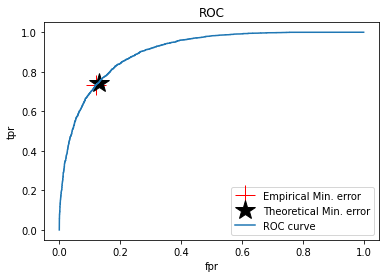

In [141]:
tprarray = np.array(tpr)
fprarray = np.array(fpr)
plt.plot(fpr[np.argmin(errorList)],tpr[np.argmin(errorList)],'+',color = 'red', markersize = 20)
plt.plot(fprt,tprt,'*',color = 'black', markersize = 20)
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC')
plt.legend(['Empirical Min. error','Theoretical Min. error', 'ROC curve'])
plt.show()

In [137]:
#theoretical error for minimum error:
print(theoreticalMinError)

0.17320000000000002


In [143]:
# empirical min error and threshold value
print(thresholdValues[np.argmin(errorList)])
print(min(errorList))
print(min(errorListAliter))
print(np.exp(thresholdValues[np.argmin(errorList)]))

0.6965886539417143
0.1704
0.1704
2.0068948041009107


In [139]:
np.log(13/7)

0.6190392084062235

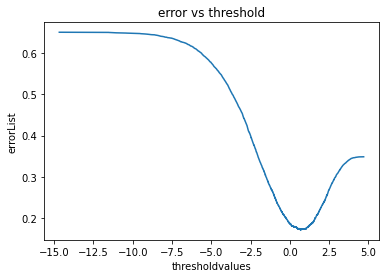

In [140]:
plt.plot(thresholdValues,errorList)
plt.xlabel('thresholdvalues')
plt.ylabel('errorList')
plt.title('error vs threshold')
plt.show()

In [150]:
#Fischer
# sample means
df.groupby("label").mean()
mean0 = df.groupby("label").mean().iloc[0].to_numpy()
mean1 = df.groupby("label").mean().iloc[1].to_numpy()

In [151]:
# sample variances
df.groupby("label").cov()
mean01 = np.array([[3],[0]])
mean02 = np.array([[0],[3]])
cov0 = np.abs(df.groupby("label").cov().loc[0].to_numpy())
cov1 = np.abs(df.groupby("label").cov().loc[1].to_numpy())
cov01 = np.array([[2,0],[0,1]])
cov02 = np.array([[1,0],[0,2]])
cov0 = 0.5*(cov01) + 0.5*(cov02) + 0.25*(np.square(mean01-mean02))
cov1=np.array([[1,0],[0,1]])

In [152]:
print(mean0)
print(mean1)
print(cov0)
print(cov1)

[1.49119695 1.53994473]
[2.00647582 1.99508093]
[[3.75 2.25]
 [2.25 3.75]]
[[1 0]
 [0 1]]


In [153]:
# Calculate Sb and Sw
Sb = np.dot((mean0-mean1),(mean0-mean1).T)
Sw = cov0+cov1
print(Sb)
print(Sw)

0.47266127352672427
[[4.75 2.25]
 [2.25 4.75]]


In [154]:
evalue,evector =np.linalg.eig(np.dot(np.linalg.inv(Sw),Sb))
Wlda = np.array(evector[np.argmax(evalue)])

In [155]:
evalue

array([0.18906451, 0.06752304])

In [156]:
evector

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [157]:
Wlda

array([0.70710678, 0.70710678])

In [158]:
#calculate fischer projections
y = np.dot(X,Wlda.T)

In [159]:
fischerThresholdValues = sorted(y)
# fischerThresholdValues = [y[i]+y[i+1] for i in range(len(y)-1)]
# fischerThresholdValues = sorted(fischerThresholdValues)
len(fischerThresholdValues)

10000

In [160]:
ftpr=[]
ffpr=[]
errorListFischer=[]
errorListAliterFischer=[]
minEmpiricalThresholdFischer = 0
minEmpiricalErrorFischer = 1
for value in fischerThresholdValues:
  tp=0
  fp=0
  tn=0
  fn=0
  decisionsFischer = (y>value).astype(int)
  assert (len(decisionsFischer) == (n0+n1))
  for i in range(len(y)):
    if(label[i]==1 and decisionsFischer[i] == 1):
      tp+=1
    if(label[i]==0 and decisionsFischer[i] == 1):
      fp+=1
    if(label[i]==1 and decisionsFischer[i] == 0):
      fn+=1
    if(label[i]==0 and decisionsFischer[i] == 0):
      tn+=1
  errorFischer = 1-((tp+tn)/(n0+n1))
  errorAliterFischer = (fp+fn)/(n0+n1)
  if(errorFischer < minEmpiricalErrorFischer):
    minEmpiricalErrorFischer = errorFischer
    minEmpiricalThresholdFischer = value
  errorListFischer.append(errorFischer)
  errorListAliterFischer.append(errorAliterFischer)
  ftpr.append(tp/(n1))
  ffpr.append(fp/(n0))
  assert (tp+fp+tn+fn == (n0+n1))

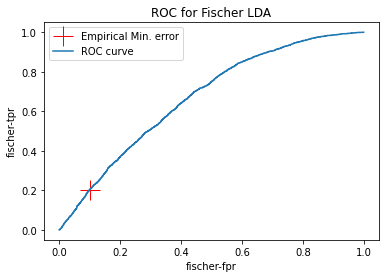

In [161]:
ftprarray = np.array(ftpr)
ffprarray = np.array(ffpr)
plt.plot(ffpr[np.argmin(errorListFischer)],ftpr[np.argmin(errorListFischer)],'+',color = 'red', markersize = 20)
plt.plot(ffpr,ftpr)
plt.xlabel('fischer-fpr')
plt.ylabel('fischer-tpr')
plt.title('ROC for Fischer LDA')
plt.legend(['Empirical Min. error','ROC curve'])
plt.show()

In [162]:
y[np.argmin(errorListFischer)]

3.8328240559086018

In [163]:
np.min(errorListFischer)

0.34550000000000003

In [140]:
y

array([1.89047766, 1.45948588, 1.38479856, ..., 2.5126046 , 2.88032427,
       0.88679109])

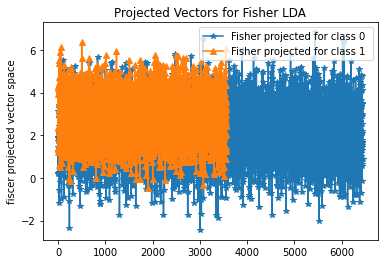

In [141]:
fl1=[]
fl0=[]
for i in range(len(y)):
  if(label[i]) == 1:
    fl1.append(y[i])
  else:
    fl0.append(y[i])
plt.plot(fl0,marker='*')
plt.plot(fl1,marker='^')
plt.ylabel('fiscer projected vector space')
plt.title('Projected Vectors for Fisher LDA')
plt.legend(['Fisher projected for class 0 ','Fisher projected for class 1'])
plt.show()

In [2]:
#Q2

mu1 = (2, 2, 2)
sigma1 = [[1,0,0],[1, 1,0.5],[1,1,1]]
sigma1 = np.array(sigma1)
sigma1 = np.dot(sigma1,sigma1.T)
sigma1 = sigma1.tolist()
mu2 = (-2, 0, 2)
sigma2 = [[1, 0,0],[1,0.5,0],[1,1,1]]
sigma2 = np.array(sigma2)
sigma2 = np.dot(sigma2,sigma2.T)
sigma2 = sigma2.tolist()
mu31= (0,0,0)
sigma31 = [[1, 0,0],[1,0,-0.5],[1,1,0]]
sigma31 = np.array(sigma31)
sigma31 = np.dot(sigma31,sigma31.T)
sigma31 = sigma31.tolist()
mu32 = (0,1,1)
sigma32 = [[1,0,0],[1,0.25,-1],[1,0.25,1]]
sigma32 = np.array(sigma32)
sigma32 = np.dot(sigma32,sigma32.T)
sigma32 = sigma32.tolist()

In [4]:
# generate data
data=[]
for i in range (10000):
  labeltogenerate = np.random.uniform()
  if(labeltogenerate > 0.6):
    disttochoose = np.random.uniform()
    if(disttochoose <= 0.5):
      value = np.random.multivariate_normal(mu31,sigma31,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(3)
      data.append(ele)
    else:
      value = np.random.multivariate_normal(mu32,sigma32,1)
      ele=[]
      ele.append(value[0][0])
      ele.append(value[0][1])
      ele.append(value[0][2])
      ele.append(3)
      data.append(ele)
  elif (labeltogenerate>0.3 and labeltogenerate <= 0.6):
    value = np.random.multivariate_normal(mu2,sigma2,1)
    ele=[]
    ele.append(value[0][0])
    ele.append(value[0][1])
    ele.append(value[0][2])
    ele.append(2)
    data.append(ele)
  else:
    value = np.random.multivariate_normal(mu1,sigma1,1)
    ele=[]
    ele.append(value[0][0])
    ele.append(value[0][1])
    ele.append(value[0][2])
    ele.append(1)
    data.append(ele)
df = pd.DataFrame(data, columns = ['x', 'y','z','label'])
df.head()

,x,y,z,label
0,0.982654,2.749891,3.725861,1
1,-2.531667,-0.121002,1.847024,2
2,-0.483938,-0.487556,-0.467545,3
3,2.155808,1.862456,1.197036,1
4,-1.082540,-0.093062,-1.219982,2


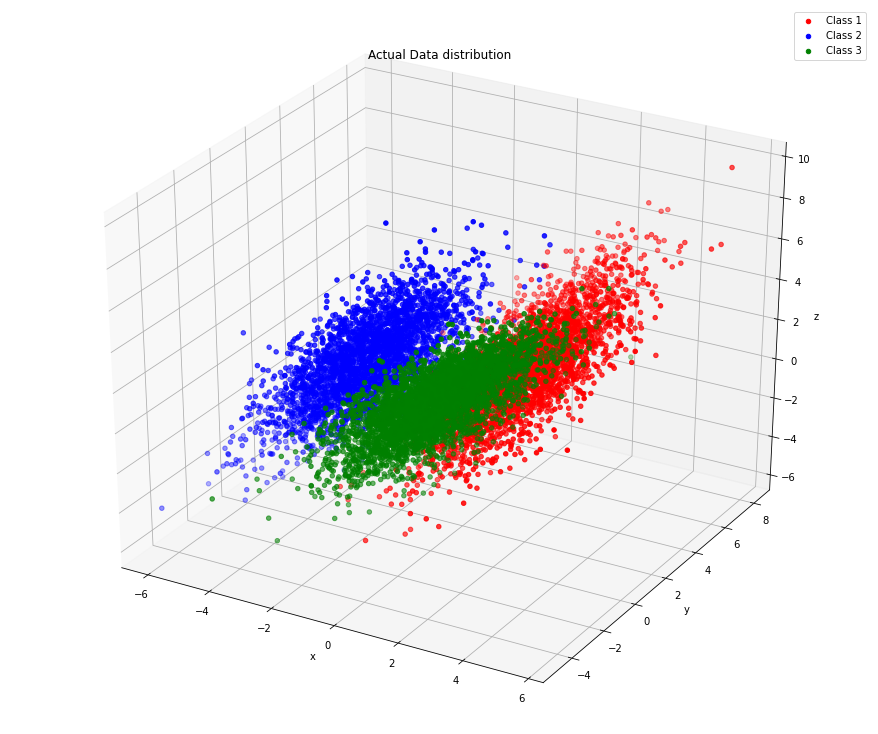

In [5]:
# Plot the actual data distribution
x0 = [i for i in range(df.shape[0]) if (df.label[i] == 1)]
x1 = [i for i in range(df.shape[0]) if (df.label[i] == 2 )]
x2 = [i for i in range(df.shape[0]) if (df.label[i] == 3 )]
fig = plt.figure(figsize=(12,10))
ax = Axes3D(fig)
ax.scatter(df.x[x0],df.y[x0],df.z[x0],'+',color ='red')
ax.scatter(df.x[x1],df.y[x1],df.z[x1],'.',color = 'blue')
ax.scatter(df.x[x2],df.y[x2],df.z[x2],'*',color = 'green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Actual Data distribution")
plt.legend(['Class 1','Class 2', 'Class 3'])
plt.show()

In [6]:
dataonly = df.drop(['label'], axis =1)
X = dataonly.to_numpy()

In [7]:
label = df.label.to_numpy()
label.shape

(10000,)

In [8]:
lossMartix = [[0,1,1],[1,0,1],[1,1,0]]
decisions=[]
c1=[]
ic12=[]
ic13=[]
c2=[]
ic21=[]
ic23=[]
c3=[]
ic31=[]
ic32=[]
for i in range(X.shape[0]):
  ans=[]
  px1 = multivariate_normal.pdf(X[i], mu1, sigma1)*0.3
  px2 = multivariate_normal.pdf(X[i], mu2, sigma2)*0.3
  px3 = (0.5*multivariate_normal.pdf(X[i], mu31, sigma31) + 0.5*multivariate_normal.pdf(X[i], mu32, sigma32))*0.4
  d1 = px2+px3
  ans.append(d1)
  d2 = px1+px3
  ans.append(d2)
  d3 = px1+px2
  ans.append(d3)
  decision = ans.index(min(ans))+1
  decisions.append(decision)
  if (decision ==1):
    if (label[i]==1):
      c1.append(i)
    elif (label[i]==2):
      ic12.append(i)
    else:
      ic13.append(i)
  elif (decision ==2):
    if (label[i]==1):
      ic21.append(i)
    elif (label[i]==2):
      c2.append(i)
    else:
      ic23.append(i)
  else:
    if (label[i]==1):
      ic31.append(i)
    elif (label[i]==2):
      ic32.append(i)
    else:
      c3.append(i)

In [9]:
print(len(c1))
print(len(ic12))
print(len(ic13))
print(len(c2))
print(len(ic21))
print(len(ic23))
print(len(c3))
print(len(ic31))
print(len(ic32))

2660
8
322
2925
6
28
3663
331
57


In [10]:
len(c1)+len(c2)+len(c3)

9248

In [11]:
n1 = (label[label==1]).shape[0]
n2 = (label[label==2]).shape[0]
n3 = (label[label==3]).shape[0]

In [15]:
print(n1)
print(n2)
print(n3)

2997
2990
4013


In [12]:
# expected risk calculation
p1=0.3
p2 = 0.3
p3 = 0.4
loss_matrix = np.array(lossMartix)
#confusion_matrix_values= [[len(c1)*(p1/n1),len(ic21)*(p1/n1),len(ic31)*(p1/n1)],[len(ic12)*(p2/n2),len(c2)*(p2/n2),len(ic32)*(p2/n2)],[len(ic13)*(p3/n3),len(ic23)*(p3/n3),len(c3)*(p3/n3)]]
confusion_matrix_values = [[len(c1)*(p1/n1), len(ic12)*(p2/n2), len(ic13)*(p3/n3)],[len(ic21)*(p1/n1), len(c2)*(p2/n2), len(ic23)*(p3/n3)],[len(ic31)*(p1/n1), len(ic32)*(p2/n2), len(c3)*(p3/n3)]]
confusion_matrix = np.array(confusion_matrix_values)
confusion_matrix[:,0]=(confusion_matrix[:,0]).astype(float)
confusion_matrix[:,1]=(confusion_matrix[:,1]).astype(float)
confusion_matrix[:,2]=(confusion_matrix[:,2]).astype(float)
print(confusion_matrix)
print(np.trace(np.dot(loss_matrix.T,confusion_matrix)))

[[0.26626627 0.00080268 0.03209569]
 [0.0006006  0.29347826 0.00279093]
 [0.03313313 0.00571906 0.36511338]]
0.07514209135407632


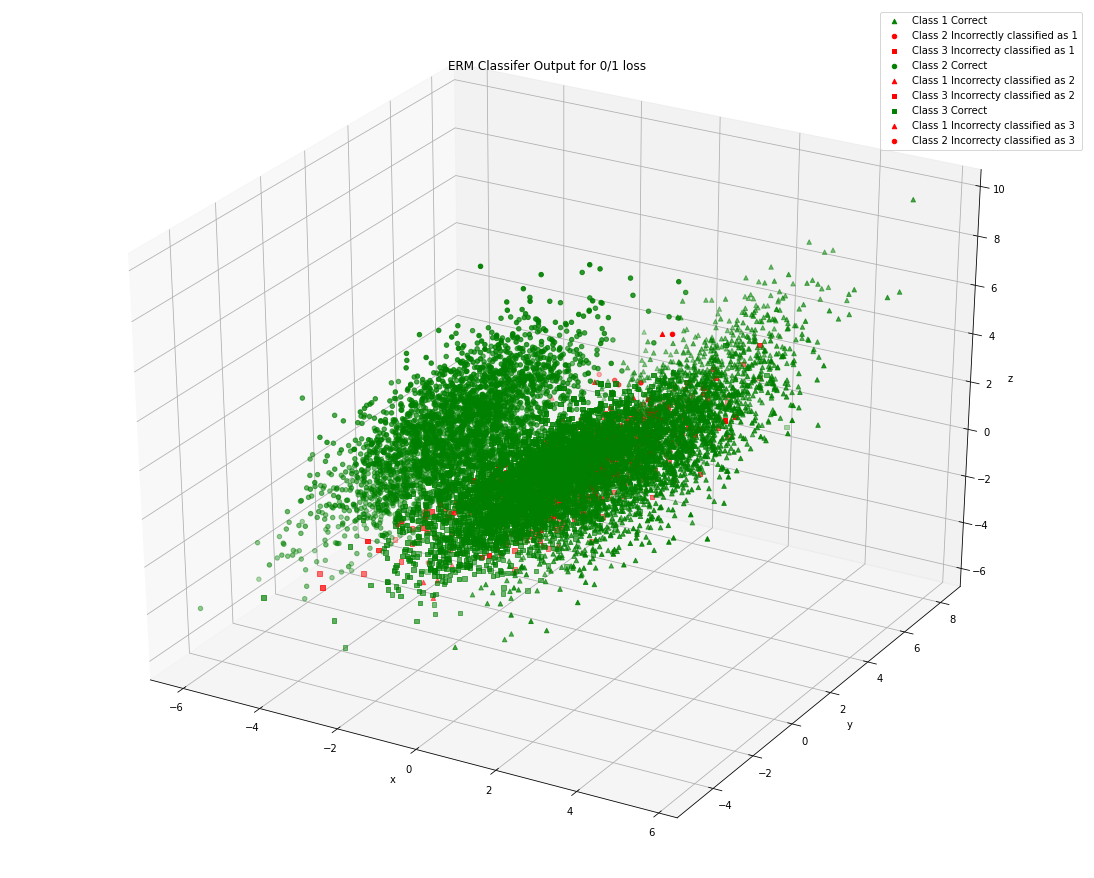

In [14]:
# Plot the outout of the classifier
fig = plt.figure(figsize=(15,12))
ax = Axes3D(fig)
ax.scatter(df.x[c1],df.y[c1],df.z[c1],marker = '^',color ='green')
ax.scatter(df.x[ic12],df.y[ic12],df.z[ic12],marker = 'o',color ='red')
ax.scatter(df.x[ic13],df.y[ic13],df.z[ic13],marker = 's',color ='red')
ax.scatter(df.x[c2],df.y[c2],df.z[c2],marker = 'o',color = 'green')
ax.scatter(df.x[ic21],df.y[ic21],df.z[ic21],marker = '^',color = 'red')
ax.scatter(df.x[ic23],df.y[ic23],df.z[ic23],marker = 's',color = 'red')
ax.scatter(df.x[c3],df.y[c3],df.z[c3],marker = 's',color = 'green')
ax.scatter(df.x[ic31],df.y[ic31],df.z[ic31],marker = '^',color = 'red')
ax.scatter(df.x[ic32],df.y[ic32],df.z[ic32],marker = 'o',color = 'red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("ERM Classifer Output for 0/1 loss")
plt.legend(['Class 1 Correct','Class 2 Incorrectly classified as 1','Class 3 Incorrecty classified as 1', 'Class 2 Correct','Class 1 Incorrecty classified as 2','Class 3 Incorrecty classified as 2', 'Class 3 Correct','Class 1 Incorrecty classified as 3','Class 2 Incorrecty classified as 3'])
plt.show()

In [16]:
# changing loss matrix to make misclassifications for label 3 10 times worse
lossMartix = [[0,1,10],[1,0,10],[1,1,0]]
decisions=[]
c1=[]
ic12=[]
ic13=[]
c2=[]
ic21=[]
ic23=[]
c3=[]
ic31=[]
ic32=[]
for i in range(X.shape[0]):
  ans=[]
  px1 = multivariate_normal.pdf(X[i], mu1, sigma1)*0.3
  px2 = multivariate_normal.pdf(X[i], mu2, sigma2)*0.3
  px3 = (0.5*multivariate_normal.pdf(X[i], mu31, sigma31) + 0.5*multivariate_normal.pdf(X[i], mu32, sigma32))*0.4
  d1 = px2+(px3*10)
  ans.append(d1)
  d2 = px1+(px3*10)
  ans.append(d2)
  d3 = px1+px2
  ans.append(d3)
  decision = ans.index(min(ans))+1
  decisions.append(decision)
  if (decision ==1):
    if (label[i]==1):
      c1.append(i)
    elif (label[i]==2):
      ic12.append(i)
    else:
      ic13.append(i)
  elif (decision ==2):
    if (label[i]==1):
      ic21.append(i)
    elif (label[i]==2):
      c2.append(i)
    else:
      ic23.append(i)
  else:
    if (label[i]==1):
      ic31.append(i)
    elif (label[i]==2):
      ic32.append(i)
    else:
      c3.append(i)

print(len(c1))
print(len(ic12))
print(len(ic13))
print(len(c2))
print(len(ic21))
print(len(ic23))
print(len(c3))
print(len(ic31))
print(len(ic32))
print(len(c1)+len(c2)+len(c3))

1868
7
35
2856
4
4
3974
1125
127
8698


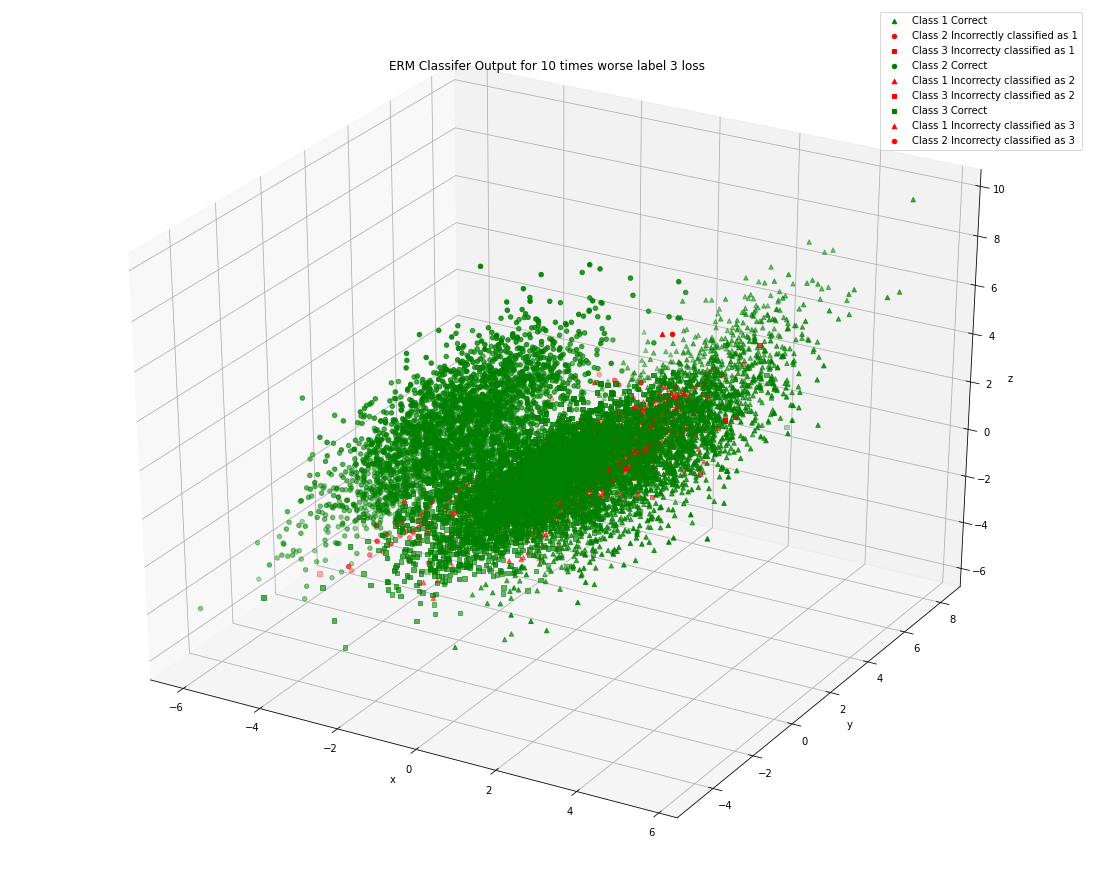

In [17]:
# Plot the outout of the classifier
fig = plt.figure(figsize=(15,12))
ax = Axes3D(fig)
ax.scatter(df.x[c1],df.y[c1],df.z[c1],marker = '^',color ='green')
ax.scatter(df.x[ic12],df.y[ic12],df.z[ic12],marker = 'o',color ='red')
ax.scatter(df.x[ic13],df.y[ic13],df.z[ic13],marker = 's',color ='red')
ax.scatter(df.x[c2],df.y[c2],df.z[c2],marker = 'o',color = 'green')
ax.scatter(df.x[ic21],df.y[ic21],df.z[ic21],marker = '^',color = 'red')
ax.scatter(df.x[ic23],df.y[ic23],df.z[ic23],marker = 's',color = 'red')
ax.scatter(df.x[c3],df.y[c3],df.z[c3],marker = 's',color = 'green')
ax.scatter(df.x[ic31],df.y[ic31],df.z[ic31],marker = '^',color = 'red')
ax.scatter(df.x[ic32],df.y[ic32],df.z[ic32],marker = 'o',color = 'red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("ERM Classifer Output for 10 times worse label 3 loss")
plt.legend(['Class 1 Correct','Class 2 Incorrectly classified as 1','Class 3 Incorrecty classified as 1', 'Class 2 Correct','Class 1 Incorrecty classified as 2','Class 3 Incorrecty classified as 2', 'Class 3 Correct','Class 1 Incorrecty classified as 3','Class 2 Incorrecty classified as 3'])
plt.show()

In [18]:
# expected risk calculation
p1=0.3
p2 = 0.3
p3 = 0.4
loss_matrix = np.array(lossMartix)
confusion_matrix_values = [[len(c1)*(p1/n1), len(ic12)*(p2/n2), len(ic13)*(p3/n3)],[len(ic21)*(p1/n1), len(c2)*(p2/n2), len(ic23)*(p3/n3)],[len(ic31)*(p1/n1), len(ic32)*(p2/n2), len(c3)*(p3/n3)]]
confusion_matrix = np.array(confusion_matrix_values)
confusion_matrix[:,0]=(confusion_matrix[:,0]).astype(float)
confusion_matrix[:,1]=(confusion_matrix[:,1]).astype(float)
confusion_matrix[:,2]=(confusion_matrix[:,2]).astype(float)
print(confusion_matrix)
print(np.trace(np.dot(loss_matrix.T,confusion_matrix)))

[[0.18698699 0.00070234 0.00348866]
 [0.0004004  0.28655518 0.0003987 ]
 [0.11261261 0.01274247 0.39611263]]
0.16533148966956482


In [19]:
# changing loss matrix to make misclassifications for label 3 100 times worse
lossMartix = [[0,1,100],[1,0,100],[1,1,0]]
decisions=[]
c1=[]
ic12=[]
ic13=[]
c2=[]
ic21=[]
ic23=[]
c3=[]
ic31=[]
ic32=[]
for i in range(X.shape[0]):
  ans=[]
  px1 = multivariate_normal.pdf(X[i], mu1, sigma1)*0.3
  px2 = multivariate_normal.pdf(X[i], mu2, sigma2)*0.3
  px3 = (0.5*multivariate_normal.pdf(X[i], mu31, sigma31) + 0.5*multivariate_normal.pdf(X[i], mu32, sigma32))*0.4
  d1 = px2+(px3*100)
  ans.append(d1)
  d2 = px1+(px3*100)
  ans.append(d2)
  d3 = px1+px2
  ans.append(d3)
  decision = ans.index(min(ans))+1
  decisions.append(decision)
  if (decision ==1):
    if (label[i]==1):
      c1.append(i)
    elif (label[i]==2):
      ic12.append(i)
    else:
      ic13.append(i)
  elif (decision ==2):
    if (label[i]==1):
      ic21.append(i)
    elif (label[i]==2):
      c2.append(i)
    else:
      ic23.append(i)
  else:
    if (label[i]==1):
      ic31.append(i)
    elif (label[i]==2):
      ic32.append(i)
    else:
      c3.append(i)

print(len(c1))
print(len(ic12))
print(len(ic13))
print(len(c2))
print(len(ic21))
print(len(ic23))
print(len(c3))
print(len(ic31))
print(len(ic32))
print(len(c1)+len(c2)+len(c3))

1015
7
3
2757
4
0
4010
1978
226
7782


In [20]:
# expected risk calculation
p1=0.3
p2 = 0.3
p3 = 0.4
loss_matrix = np.array(lossMartix)
confusion_matrix_values = [[len(c1)*(p1/n1), len(ic12)*(p2/n2), len(ic13)*(p3/n3)],[len(ic21)*(p1/n1), len(c2)*(p2/n2), len(ic23)*(p3/n3)],[len(ic31)*(p1/n1), len(ic32)*(p2/n2), len(c3)*(p3/n3)]]
confusion_matrix = np.array(confusion_matrix_values)
confusion_matrix[:,0]=(confusion_matrix[:,0]).astype(float)
confusion_matrix[:,1]=(confusion_matrix[:,1]).astype(float)
confusion_matrix[:,2]=(confusion_matrix[:,2]).astype(float)
print(confusion_matrix)
print(np.trace(np.dot(loss_matrix.T,confusion_matrix)))

[[1.01601602e-01 7.02341137e-04 2.99028158e-04]
 [4.00400400e-04 2.76622074e-01 0.00000000e+00]
 [1.97997998e-01 2.26755853e-02 3.99700972e-01]]
0.25167914066829544


In [49]:
print(n1)
print(n2)
print(n3)

3005
2996
3999


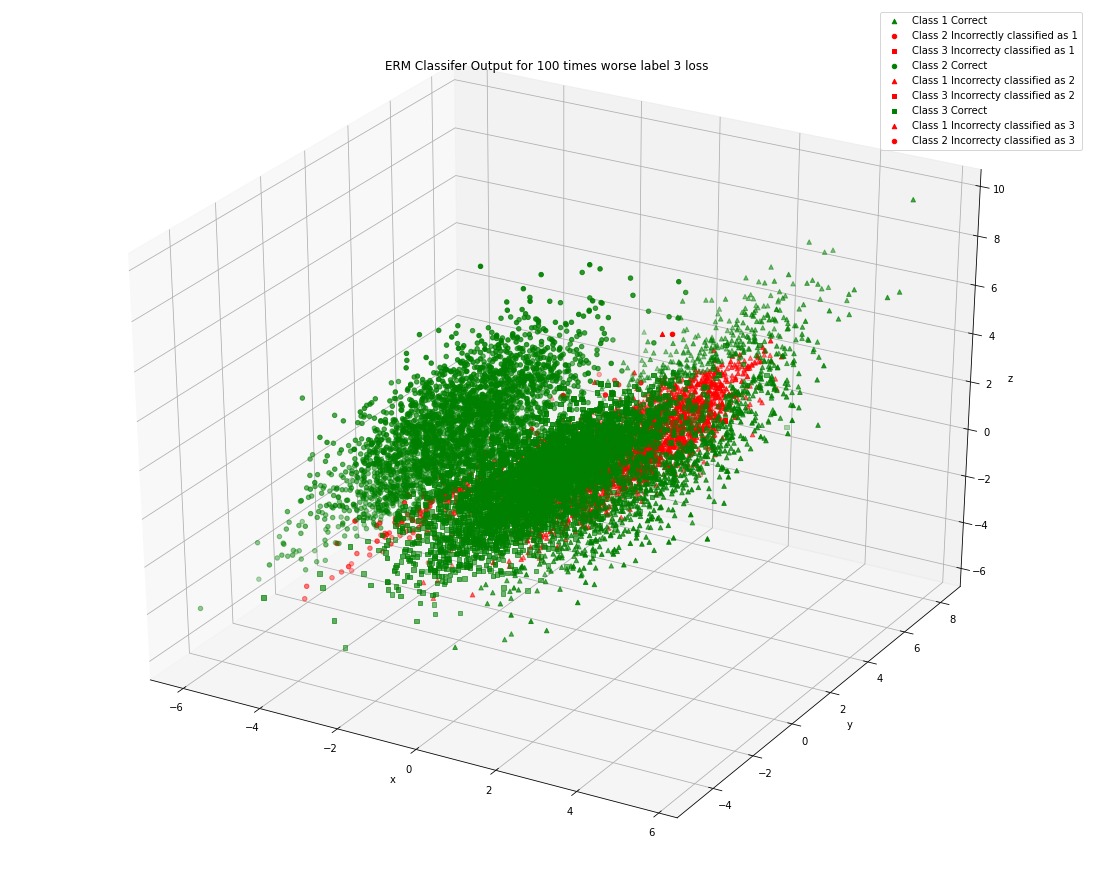

In [21]:
# Plot the outout of the classifier
fig = plt.figure(figsize=(15,12))
ax = Axes3D(fig)
ax.scatter(df.x[c1],df.y[c1],df.z[c1],marker = '^',color ='green')
ax.scatter(df.x[ic12],df.y[ic12],df.z[ic12],marker = 'o',color ='red')
ax.scatter(df.x[ic13],df.y[ic13],df.z[ic13],marker = 's',color ='red')
ax.scatter(df.x[c2],df.y[c2],df.z[c2],marker = 'o',color = 'green')
ax.scatter(df.x[ic21],df.y[ic21],df.z[ic21],marker = '^',color = 'red')
ax.scatter(df.x[ic23],df.y[ic23],df.z[ic23],marker = 's',color = 'red')
ax.scatter(df.x[c3],df.y[c3],df.z[c3],marker = 's',color = 'green')
ax.scatter(df.x[ic31],df.y[ic31],df.z[ic31],marker = '^',color = 'red')
ax.scatter(df.x[ic32],df.y[ic32],df.z[ic32],marker = 'o',color = 'red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("ERM Classifer Output for 100 times worse label 3 loss")
plt.legend(['Class 1 Correct','Class 2 Incorrectly classified as 1','Class 3 Incorrecty classified as 1', 'Class 2 Correct','Class 1 Incorrecty classified as 2','Class 3 Incorrecty classified as 2', 'Class 3 Correct','Class 1 Incorrecty classified as 3','Class 2 Incorrecty classified as 3'])
plt.show()